In [12]:
from typing_extensions import TypedDict
from typing import Literal

In [13]:
class TypedState(TypedDict):
    name:str 
    game:Literal['cricket','badminton']

In [22]:
def play_game(state:TypedState):
    print("play_game node has been called")
    return {"name":state["name"]+ " wanted to play"}

def cricket(state:TypedState):
    print("cricket node has been called")
    return {"game":"cricket"}

def badminton(state:TypedState):
    print("badminton node has been called")
    return {"game":"badminton"}

In [36]:
def play_game(state:TypedState):
    print("play_game node has been called")
    return {"name":state["name"]+ " wanted to play"}

def cricket(state:TypedState):
    print("cricket node has been called")
    return {"name":state["name"]+" cricket","game":"cricket"}

def badminton(state:TypedState):
    print("badminton node has been called")
    return {"name":state["name"]+" badminton","game":"badminton"}

In [ ]:
def play_game(state:TypedState):
    print("play_game node has been called")
    return {"name":state["name"]}

def cricket(state:TypedState):
    print("cricket node has been called")
    return {"game":"cricket"}

def badminton(state:TypedState):
    print("badminton node has been called")
    return {"game":"badminton"}

In [46]:
import random 

def random_play(state:TypedState)->Literal['cricket','badminton']:
    if random.random()>0.5:
        return 'cricket' 
    else:
        return 'badminton'

In [9]:
from langgraph.graph import StateGraph, START, END

In [14]:
graph=StateGraph(TypedState)

graph.add_node("play_game",play_game)
graph.add_node("cricket",cricket)
graph.add_node("badminton",badminton)

In [56]:
graph.add_edge(START,"play_game")
graph.add_conditional_edges('play_game',random_play)
graph.add_edge("cricket",END)
graph.add_edge("badminton",END)

In [57]:
graph_builder=graph.compile()

In [12]:
from IPython.display import Image, display

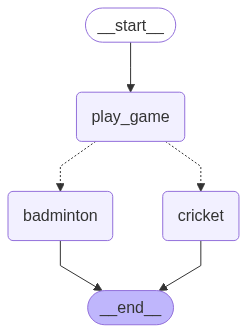

In [58]:
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [51]:
graph_builder.invoke({'name':'vikas'})

play_game node has been called
cricket node has been called


{'name': 'vikas', 'game': 'cricket'}

In [52]:
graph_builder.invoke({'name':'madhu'})

play_game node has been called
badminton node has been called


{'name': 'madhu', 'game': 'badminton'}

In [ ]:
graph_builder.invoke({'name':123})    
# this is the problem. even if you provide integer also it accepts. to overcome this we go for pydantic 

play_game node has been called
cricket node has been called


{'name': 123, 'game': 'cricket'}

In [3]:
from dataclasses import dataclass
from typing import Literal

In [4]:
@dataclass
class DataClassState:
    name:str 
    game:Literal['cricket','badminton']

In [6]:
def play_game(state:DataClassState):
    print("play_game node has been called")
    return {"name":state.name+ " wanted to play"}

def cricket(state:DataClassState):
    print("cricket node has been called")
    return {"name":state.name+" cricket","game":"cricket"}

def badminton(state:DataClassState):
    print("badminton node has been called")
    return {"name":state.name+" badminton","game":"badminton"}

In [8]:
import random 

def random_play(state:DataClassState)->Literal['cricket','badminton']:
    if random.random()>0.5:
        return 'cricket' 
    else:
        return 'badminton'

In [15]:
graph=StateGraph(DataClassState)

graph.add_node("play_game",play_game)
graph.add_node("cricket",cricket)
graph.add_node("badminton",badminton)

In [16]:
graph.add_edge(START,"play_game")
graph.add_conditional_edges('play_game',random_play)
graph.add_edge("cricket",END)
graph.add_edge("badminton",END)

In [17]:
graph_builder=graph.compile()

In [25]:
graph_builder.invoke({'name':'vikas','game':"cricket"})

play_game node has been called
cricket node has been called


{'name': 'vikas wanted to play cricket', 'game': 'cricket'}